# 문서 유사도 - 코사인 유사도

In [1]:
import numpy as np
import matplotlib.pyplot as plt


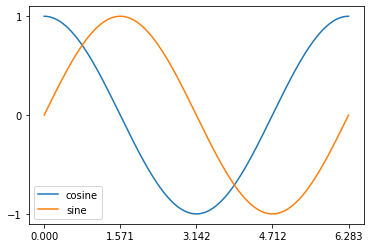

In [4]:
xs = np.linspace(0, 2*np.pi, 200)
cosx = np.cos(xs)
sinx = np.sin(xs)

plt.plot(xs,cosx,label = "cosine")
plt.plot(xs,sinx,label = "sine")
plt.legend(), plt.grid
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.yticks([-1, 0,1])
plt.show()

In [5]:
v1, v2, v3 = np.array([1,1,0]), np.array([2,1,0]), np.array([0,0,1])
v1_norm = np.sqrt(np.sum(np.square(v1)))
v2_norm = np.sqrt(np.sum(np.square(v2)))
v3_norm = np.sqrt(np.sum(np.square(v3)))
v1_norm, v2_norm, v3_norm

(1.4142135623730951, 2.23606797749979, 1.0)

In [6]:
# v1과 v2의 유사도, v1과 v3의 유사도
cos12 = np.dot(v1, v2) / (v1_norm * v2_norm)
cos13 = np.dot(v1, v3) / (v1_norm * v3_norm)
cos12, cos13

(0.9486832980505138, 0.0)

In [7]:
def cos_similarity(v1,v2):
    v1_norm = np.sqrt(np.sum(np.square(v1)))
    v2_norm = np.sqrt(np.sum(np.square(v2)))
    return np.dot(v1, v2) / (v1_norm * v2_norm)

In [10]:
cos_similarity(np.array(range(1,100, 3)), np.array(range(1,132,4)))

0.999997517151327

In [11]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvect = CountVectorizer()
doc_cv = cvect.fit_transform(doc_list)
doc_cv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]])

In [19]:
d1,d2,d3 = doc_cv.toarray()
d1,d2,d3

(array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2]),
 array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]))

In [25]:
print(f"문장1 vs 문장2: {cos_similarity(d1,d2)}")
print(f"문장1 vs 문장3: {cos_similarity(d1,d3)}")
print(f"문장2 vs 문장3: {cos_similarity(d2,d3)}")


문장1 vs 문장2: 0.40207758214950134
문장1 vs 문장3: 0.4042504477594862
문장2 vs 문장3: 0.45647296026166395


In [ ]:
tvect =TfidfVectorizer()
doc_tv = tvect.fit_transform(doc_list)
doc_tv.toarray()

In [27]:
d1,d2,d3 = doc_tv.toarray()
print(f"문장1 vs 문장2: {cos_similarity(d1,d2)}")
print(f"문장1 vs 문장3: {cos_similarity(d1,d3)}")
print(f"문장2 vs 문장3: {cos_similarity(d2,d3)}")


문장1 vs 문장2: 0.40207758214950134
문장1 vs 문장3: 0.4042504477594862
문장2 vs 문장3: 0.45647296026166395


scikit-learn 코사인 유사도

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([d1],[d2])

array([[0.40207758]])

In [32]:
cosine_similarity(doc_cv)

array([[1.        , 0.6092718 , 0.63960215],
       [0.6092718 , 1.        , 0.68041382],
       [0.63960215, 0.68041382, 1.        ]])

In [33]:
cosine_similarity(doc_tv,doc_tv)

array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])